In [34]:
#install.packages("ISLR", dependencies = TRUE)
library(MASS)
library(ISLR)
library(corrplot)
library(scatterplot3d)
library(plotly)
library(rgl)
library(knitr)
library(dplyr)
library(ggplot2)
library(broom)
library(ggfortify)

# Linear Regression
* [$R_2$ Statistic](#R_2-Statistic)
* [Correlation Matrix](#Correlation-Matrix)
* [Advertising Example](#Advertising-Example)
* [Credit Example](#Credit-Example)

For full text, please refer check [*An Introduction to Statistical Learning*](https://link.springer.com/book/10.1007/978-1-4614-7138-7).

# Linear Regression

The linear regression model is expressed as follows
$$Y= \beta_0 + \sum_{j=1}^{p}\beta_{j} X_{j},$$
where $X_j$ represents the j-th predictor and $\beta_j$ quantifies the association between that variable and the response.

In case that $p=2$, $\beta_0$ and $\beta_1$ are known the intercept and slope terms, respectively. 

In practice, we cannot identify $\beta_0,~\beta_1,~\ldots,~\beta_p$. Instead, we can have estimates $\hat{\beta}_0,\hat{\beta}_1, \ldots, \hat{\beta}_p$. Given estimates $\hat{\beta}_0$, $\hat{\beta}_1$, $\ldots$, $\hat{\beta}_p$, the following formula can be used for predictions,
$$\hat{y}=\hat{\beta}_0 +\hat{\beta}_1x_1 +\hat{\beta}_2 x_2 + \ldots +\hat{\beta}_p x_p.$$


Using the least-squares approach, $\beta_0$, $\beta_1$, $\ldots$, $\beta_p$ can be chosen to minimize the sum of squared residuals

\begin{align}
RSS=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-\hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \hat{\beta}_2 x_{i2} - \hat{\beta}_3 x_{i3}-\ldots - \hat{\beta}_p x_{ip})^2.
\end{align}

There are a few definitions that we need throughout this document.

## R_2 Statistic
The $R^2$ statistic is a measure of the linear relationship between $X$ and $Y$. To calculate $R^2$ , we use the formula
$$R^2 =1-\frac{\sum_{i=1}^{n}(y_i −  \hat{y}_i) 2}{\sum_{i=1}^{n}(y_i −  \bar{y}) 2}$$

## Correlation Matrix
 It is a matrix in which i-j position defines the correlation between the ith and jth parameter of the given data-set. Defined as correlation
$$Cor(X,Y )=\frac{\sum_{i=1}^{n}(x_i −  \bar{x})(y_i −  \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i −  \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i −  \bar{y})^2}} $$

Correlation Matrix is basically a covariance matrix. Also known as the auto-covariance matrix, dispersion matrix, variance matrix, or variance-covariance matrix.

## Advertising Example
Consider the following example.

In [35]:
advertising = read.csv(file="Data/advertising.csv",head=TRUE,sep=",");
head(advertising)

TV,Radio,Newspaper,Sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


 Here, $\beta_j$ is interpreted as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. We have
$$sales = \beta_0 + \beta_1 × TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon. $$

$\beta_0$, $\beta_1$, $\beta_2$ and $\beta_3$

In [36]:
linearModel=lm(Sales ~ TV + Radio + Newspaper ,data=advertising)
summary(linearModel)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


As can be seen,
* For a fixed amount of TV and newspaper advertising, spending an additional $1,000 on radio advertising can increase sales by approximately 189 units.

* For a fixed amount of Radio and newspaper advertising, spending an additional $1,000 on TV advertising can increase sales by approximately 46 units.

* However, the coefficient estimate for the newspaper is very close to zero, and the corresponding p-value is insignificant.

In [37]:
coef(linearModel)
confint(linearModel)

(Intercept)           TV        Radio    Newspaper 
 2.938889369  0.045764645  0.188530017 -0.001037493

,2.5 %,97.5 %
(Intercept),2.32376228,3.55401646
TV,0.04301371,0.04851558
Radio,0.17154745,0.20551259
Newspaper,-0.01261595,0.01054097


RSS:

In [38]:
# RSS with regression coefficients
RSS = sum((advertising['Sales'] - predict(linearModel, advertising) )^2)/1000
RSS

[1] 0.5568253

Correlation Matrix:

In [39]:
Cor_Mat=cor(advertising)
Cor_Mat

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
Radio,0.05480866,1.00000000,0.35410375,0.5762226
Newspaper,0.05664787,0.35410375,1.00000000,0.2282990
Sales,0.78222442,0.57622257,0.22829903,1.0000000


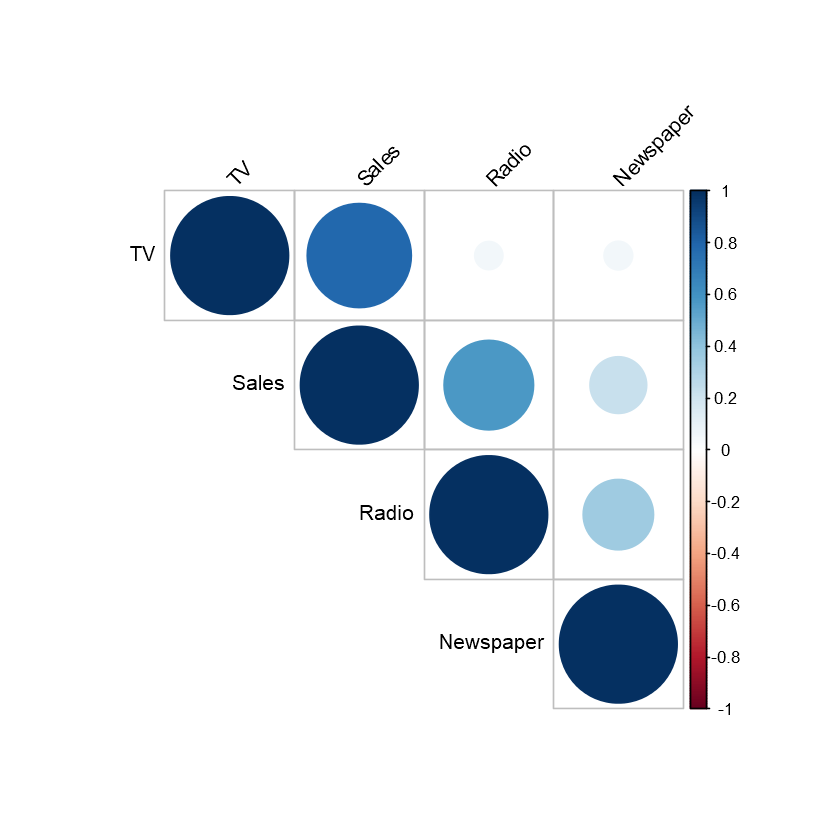

In [40]:
corrplot(Cor_Mat, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

We can see that the correlation between radio and newspaper is about 0.35. In other words, we can see a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising.

Since p-value of the newspaper advertising is insignificant, we can provide a 3D diagram with sale, TV, and Radio advertising data.

$$sales = \beta_0 + \beta_1 × TV + \beta_2 \times radio$$


Call:
lm(formula = Sales ~ TV + Radio, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7977 -0.8752  0.2422  1.1708  2.8328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92110    0.29449   9.919   <2e-16 ***
TV           0.04575    0.00139  32.909   <2e-16 ***
Radio        0.18799    0.00804  23.382   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.681 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


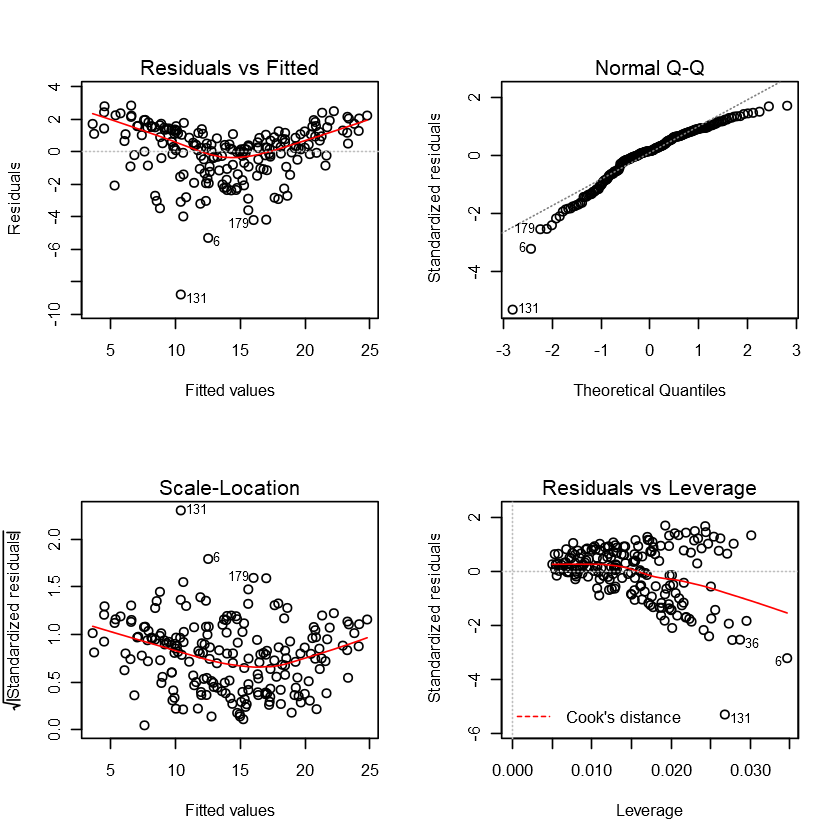

In [59]:
linearModel=lm(Sales ~ TV + Radio ,data=advertising)
summary(linearModel)
par(mfrow=c(2,2))
plot(linearModel)

Note that we do not have to define our linear model in additive way. For example we can define a linear model that uses radio, TV, and an interaction between the two to predict sales takes the
form
\begin{align}
sales &= \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times ( radio \times TV ) + \epsilon\\
&= \beta_0 + (\beta_1 + \beta_3 \times radio ) \times TV + \beta_2 \times radio + \epsilon.
\end{align}


Call:
lm(formula = Sales ~ TV + Radio + TV * Radio, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3366 -0.4028  0.1831  0.5948  1.5246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.750e+00  2.479e-01  27.233   <2e-16 ***
TV          1.910e-02  1.504e-03  12.699   <2e-16 ***
Radio       2.886e-02  8.905e-03   3.241   0.0014 ** 
TV:Radio    1.086e-03  5.242e-05  20.727   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9435 on 196 degrees of freedom
Multiple R-squared:  0.9678,	Adjusted R-squared:  0.9673 
F-statistic:  1963 on 3 and 196 DF,  p-value: < 2.2e-16


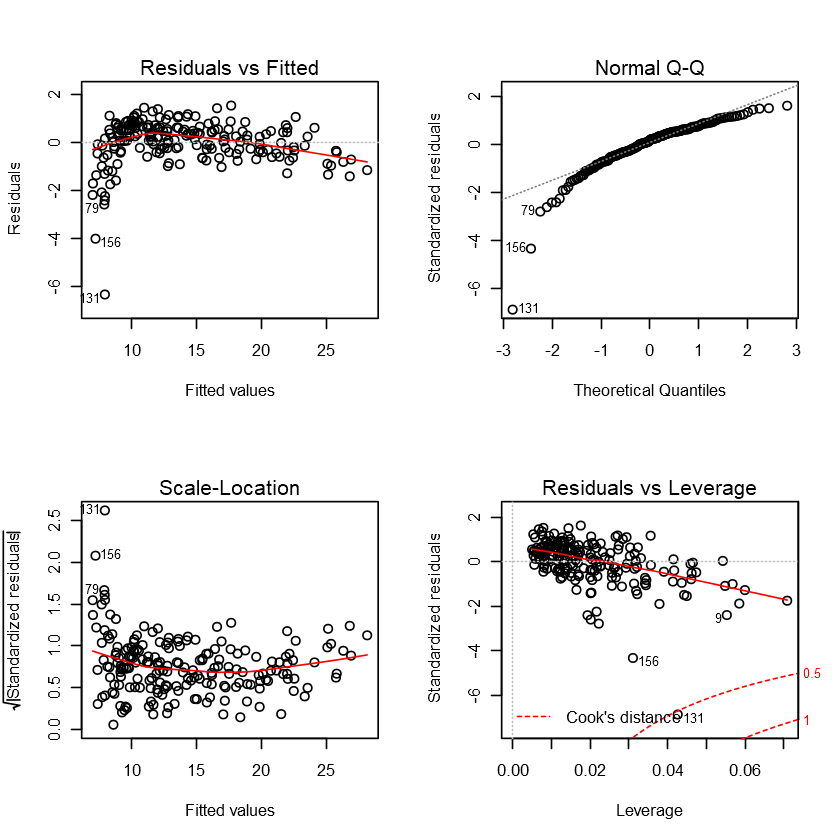

In [58]:
linearModel=lm(Sales ~ TV + Radio + TV*Radio ,data=advertising)
summary(linearModel)
par(mfrow=c(2,2))
plot(linearModel)

The results clearly suggest that the model that includes the interaction term is superior to the model that contains only the main effects. Since the p-value for the interaction term, TV x radio, is noticeably low, it is clear that the true relationship is **not additive**. 

## Credit Example

In [46]:
credit = read.csv(file="Data/Credit.csv",head=TRUE,sep=",");
head(credit)

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
104.593,7075,514,4,71,11,Male,No,No,Asian,580
148.924,9504,681,3,36,11,Female,No,No,Asian,964
55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


The Credit data set contains information about **balance**, **age**, **cards**, **education**, **income**, **limit**, and **rating** for a number of potential customers.

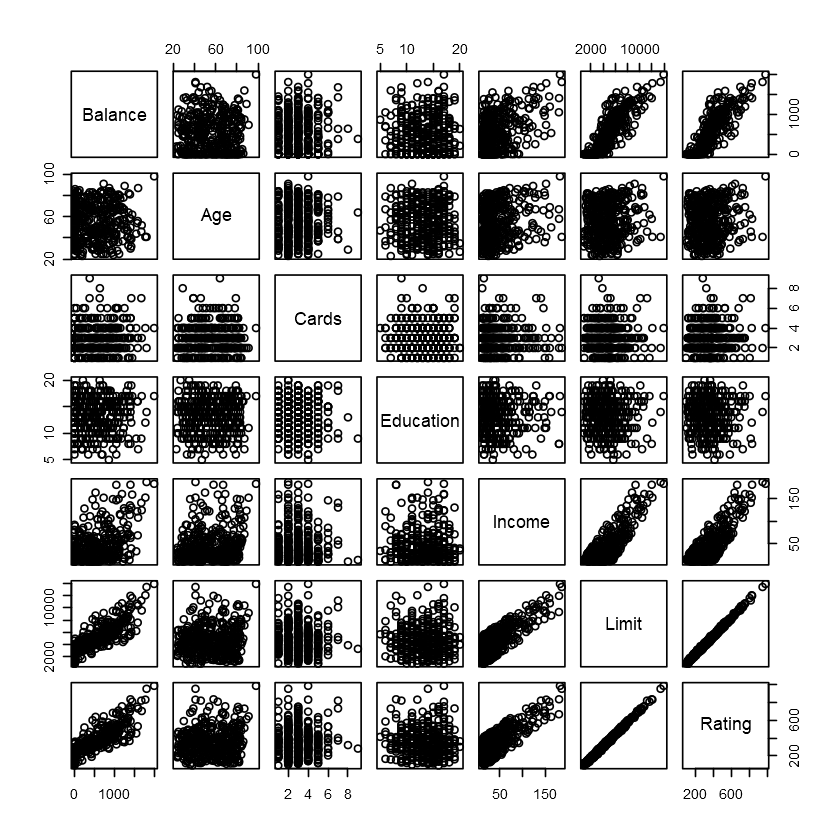

In [47]:
pairs(credit[,c("Balance", "Age", "Cards", "Education", "Income", "Limit", "Rating")])

Each panel of the Figure is a scatterplot for a ***pair of variables*** whose identities are given by the corresponding row and column labels.

For example, the scatterplot directly to the right of the word “Balance” depicts balance versus _age_ , while the plot directly to the right of “Age” corresponds to _age_ versus _cards_ . In addition to these quantitative variables, we also have four qualitative variables: gender , student (student status), status (marital status), and ethnicity (Caucasian, African American or Asian). 

#### Predictors with Only Two Levels

We simply create an indicator or dummy variable that takes on two possible dummy variable numerical values (binary values).

For example, based on the gender variable, we can create a new binary variable that takes the form
$$x_i =\begin{cases}1, & \mbox{if ith person is female}, \\0, & \mbox{if ith person is male},\end{cases}$$

and the regression equation:

$$y_i = \beta_0 + \beta_1 x i + \epsilon_i =\begin{cases}\beta_0 + \beta_1 + \epsilon_i, & \mbox{if ith person is female}, \\\beta_0 + \epsilon_i , & \mbox{if ith person is male.}\end{cases}$$

In [50]:
linearModel=lm(Balance ~ C(Gender) ,data=credit)
summary(linearModel)


Call:
lm(formula = Balance ~ C(Gender), data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-529.54 -455.35  -60.17  334.71 1489.20 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       509.80      33.13  15.389   <2e-16 ***
C(Gender)Female    19.73      46.05   0.429    0.669    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 460.2 on 398 degrees of freedom
Multiple R-squared:  0.0004611,	Adjusted R-squared:  -0.00205 
F-statistic: 0.1836 on 1 and 398 DF,  p-value: 0.6685


$$y_{i} = \beta_0 +\beta_1 x_{i1} +\beta_2 x_{i2} +\epsilon_i =
\begin{cases}
\beta_0 +\beta_1 +\epsilon_i , & \mbox{if ith person is Asian},\\
\beta_0 +\beta_2 +\epsilon_i, & \mbox{ if ith person is Caucasian},\\
\beta_0 +\epsilon_i , & \mbox{if ith person is African American}.
\end{cases}$$ 

In [51]:
linearModel=lm(Balance ~ C(Ethnicity) ,data=credit)
summary(linearModel)


Call:
lm(formula = Balance ~ C(Ethnicity), data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-531.00 -457.08  -63.25  339.25 1480.50 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             531.00      46.32  11.464   <2e-16 ***
C(Ethnicity)Asian       -18.69      65.02  -0.287    0.774    
C(Ethnicity)Caucasian   -12.50      56.68  -0.221    0.826    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 460.9 on 397 degrees of freedom
Multiple R-squared:  0.0002188,	Adjusted R-squared:  -0.004818 
F-statistic: 0.04344 on 2 and 397 DF,  p-value: 0.9575


$$y_i = \beta_0 + \beta_1 x i + \epsilon_i =\begin{cases}\beta_0 + \beta_1 + \epsilon_i, & \mbox{if ith person is Married}, \\\beta_0 + \epsilon_i , & \mbox{if ith person is not Married.}\end{cases}$$

In [52]:
linearModel=lm(Balance ~ C(Married) ,data=credit)
summary(linearModel)


Call:
lm(formula = Balance ~ C(Married), data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-523.29 -451.03  -60.12  345.06 1481.06 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    523.290     36.974  14.153   <2e-16 ***
C(Married)Yes   -5.347     47.244  -0.113     0.91    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 460.3 on 398 degrees of freedom
Multiple R-squared:  3.219e-05,	Adjusted R-squared:  -0.00248 
F-statistic: 0.01281 on 1 and 398 DF,  p-value: 0.9099


There is an interaction term between income and student. We have

\begin{align}
\text{balance}_i \approx \beta_0 + \beta_1 \times \text{income}_i +
\begin{cases}
\beta_2, & \mbox{if ith person is a student},\\0, & \mbox{if ith person is not a student} \\
\end{cases}
=\beta_1 \times \text{income}_i +
\begin{cases}
\beta_0 + \beta_2, & \mbox{if ith person is a student},\\ \beta_0, & \mbox{if ith person is not a student} \\
\end{cases}
\end{align} 

\begin{align}
\text{balance}_i &\approx \beta_0 + \beta_1 \times \text{income}_i +
\begin{cases}
\beta_2+\beta_3 \times \text{income}_i, & \mbox{if ith person is a student},\\0, & \mbox{if ith person is not a student} \\
\end{cases}\\
&=\begin{cases}
(\beta_0+\beta_2)+(\beta_1+\beta_3) \times \text{income}_i, & \mbox{if ith person is a student},\\ \beta_0 + \beta_1 \times \text{income}_i, & \mbox{if ith person is not a student} \\
\end{cases}
\end{align} 

**Regression 1 - without interaction term:**


Call:
lm(formula = Balance ~ Income + Student, data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-762.37 -331.38  -45.04  323.60  818.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211.1430    32.4572   6.505 2.34e-10 ***
Income        5.9843     0.5566  10.751  < 2e-16 ***
StudentYes  382.6705    65.3108   5.859 9.78e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 391.8 on 397 degrees of freedom
Multiple R-squared:  0.2775,	Adjusted R-squared:  0.2738 
F-statistic: 76.22 on 2 and 397 DF,  p-value: < 2.2e-16


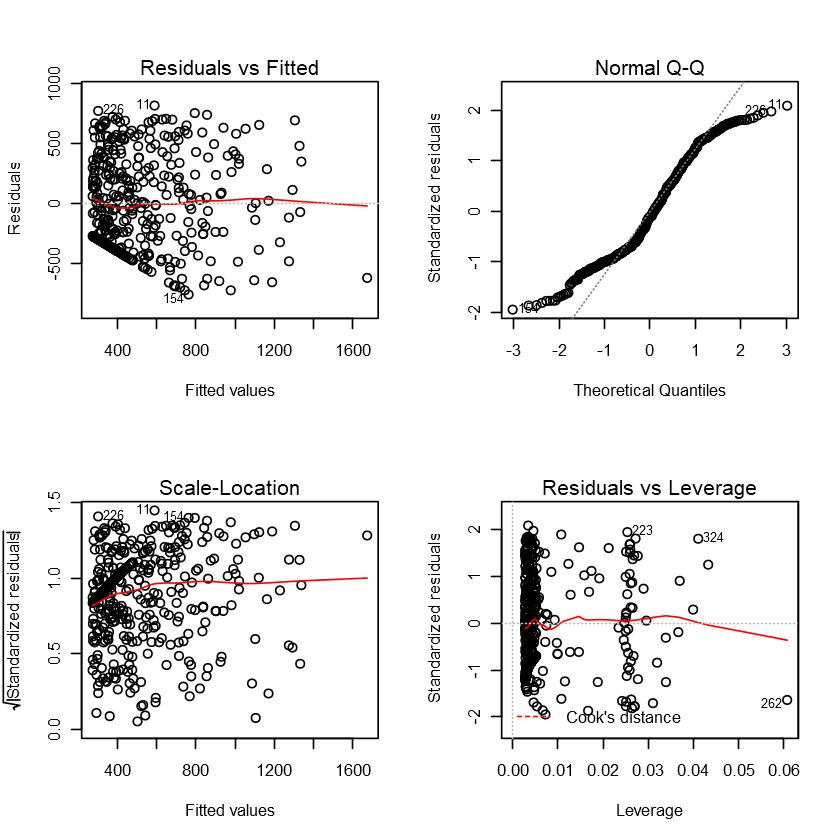

In [56]:
linearModel1=lm(Balance ~ Income + Student ,data=credit)
summary(linearModel1)
par(mfrow=c(2,2))
plot(linearModel1)

**Regression 2 - with interaction term:**


Call:
lm(formula = Balance ~ Income + Income * Student, data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-773.39 -325.70  -41.13  321.65  814.04 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       200.6232    33.6984   5.953 5.79e-09 ***
Income              6.2182     0.5921  10.502  < 2e-16 ***
StudentYes        476.6758   104.3512   4.568 6.59e-06 ***
Income:StudentYes  -1.9992     1.7313  -1.155    0.249    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 391.6 on 396 degrees of freedom
Multiple R-squared:  0.2799,	Adjusted R-squared:  0.2744 
F-statistic:  51.3 on 3 and 396 DF,  p-value: < 2.2e-16


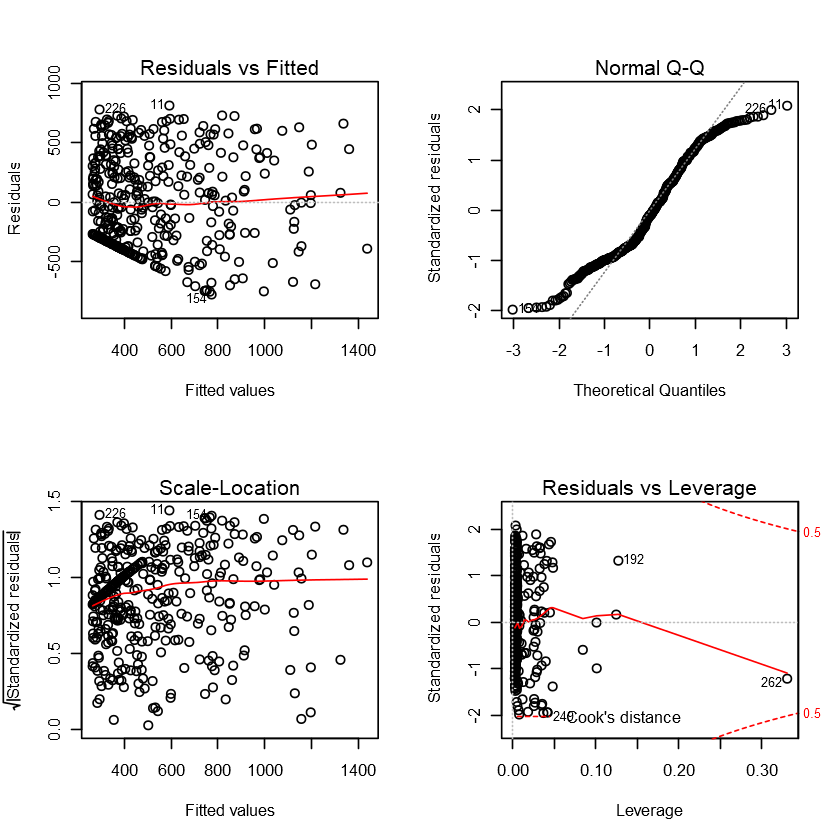

In [57]:
linearModel2=lm(Balance ~ Income + Income*Student ,data=credit)
summary(linearModel2)
par(mfrow=c(2,2))
plot(linearModel2)